In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [2]:
df_raw = pd.read_csv('houseprice_hw.csv')
df_raw.head()

,Unnamed: 0,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


In [3]:
df_raw.isnull().sum()

Unnamed: 0      0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

## 목표 레이블 : SalePrice

### exersise1. corr(), scatter을 이용해서 가장 상관관계가 큰 2개의 특성만 골라보기- OverallQual , GrLivArea

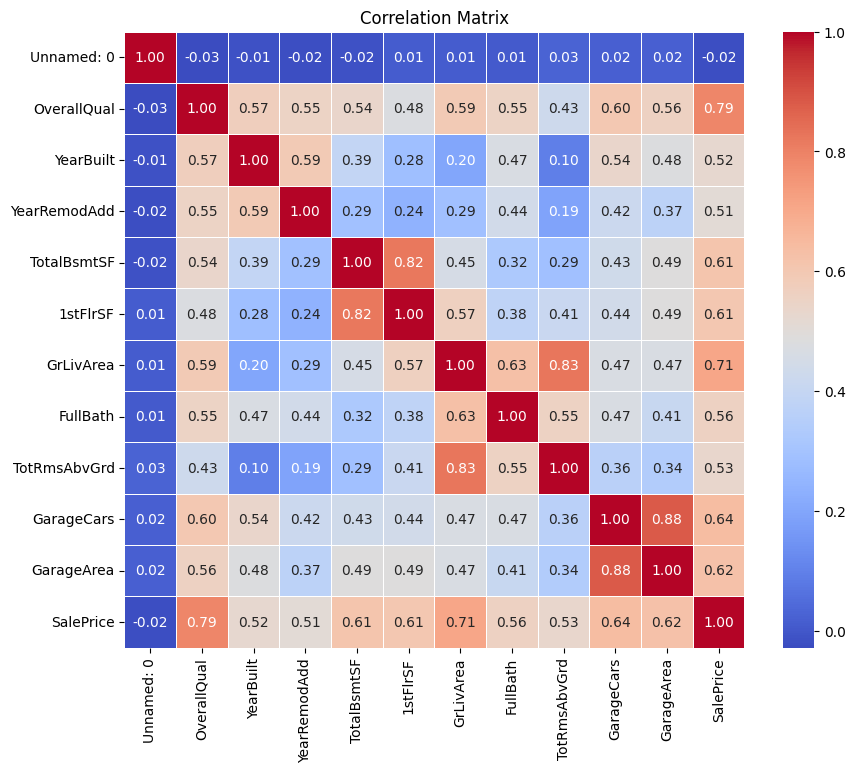

In [4]:
## code here!

# 상관행렬 계산
corr_matrix = df_raw.corr()

# 상관계수 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



In [5]:
# 'Unnamed: 0' 컬럼 삭제
df_clean = df_raw.drop(columns=['Unnamed: 0'])

# 결과 확인
df_clean.head()


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


/var/folders/6q/q927ypwn4ll9d4rvjq9gl1qw0000gn/T/ipykernel_83571/1141392223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_price.index, y=corr_with_price.values, palette="coolwarm")


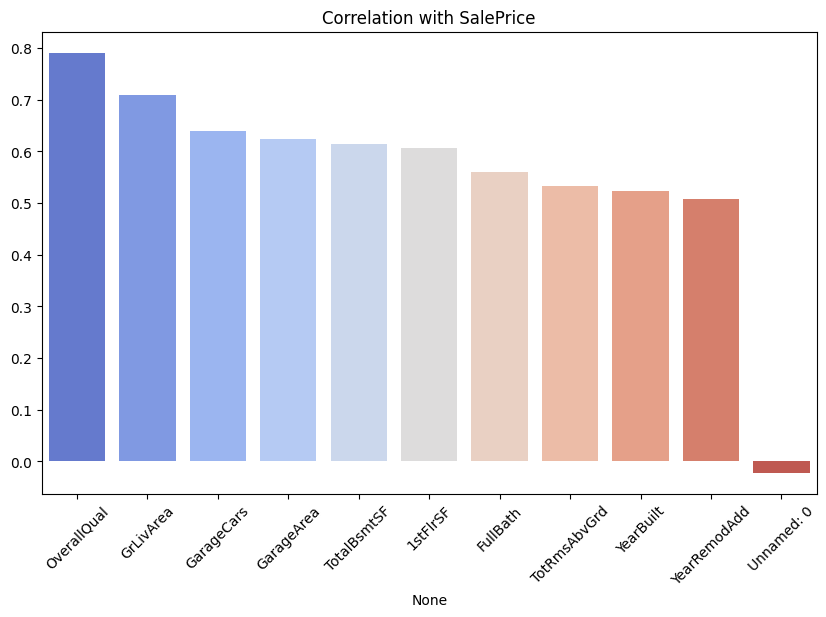

In [6]:
# SalePrice와 다른 변수들 간의 상관관계
corr_with_price = corr_matrix["SalePrice"].drop("SalePrice").sort_values(ascending=False)

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_price.index, y=corr_with_price.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Correlation with SalePrice")
plt.show()


### 퍼셉트론 알고리즘으로 모델 학습시키기.

hint! numpy배열을 함수의 인자로 하고, df는 함수의 인자로 받지 않으니깐, values를 이용해서 df의 값만 넣어주자.

df에 표준화를 하고, 학습시키는것을 권장. 

!!**주의**!! : 나중에 임의의 값 예측하기 위해서는 사용했던 표준화함수로 내가 넣고싶은값을 다시 표준화 해야함!!

model.predict(df_X, df_Y) (x)

model.predict(df_X.value, df_Y.value) (x)

In [7]:
## 예측하고나서, 3개정도의 값을 임의의로 넣어서 예측결과 출력해보시오!
## code here!

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron


In [8]:
# 데이터 전처리
X = df_clean.drop(columns=['SalePrice']).values  # 특성
y = df_clean['SalePrice'].values  # 타겟 변수

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 특성을 표준화

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
# 퍼셉트론 모델 정의
model = Perceptron(random_state=1, eta0=0.1)
# 모델 학습
model.fit(X_train, y_train)


Perceptron(eta0=0.1, random_state=1)

In [14]:
# 테스트 세트로 예측하기
y_pred = model.predict(X_test)

# 평균 오차 계산
mean_error = np.mean(np.abs(y_test - y_pred))  # 평균 절대 오차

# 결과 출력
print("평균 오차 (Mean Error):", mean_error)

평균 오차 (Mean Error): 61658.729452054795


In [17]:
X_test.value_counts()

Unnamed: 0  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  GarageCars  GarageArea
15          7            1929       2001          832          854       854        1         5             2           576           1
916         2            1949       1950          480          480       480        0         4             1           308           1
994         10           2006       2007          1700         1718      1718       2         7             3           786           1
990         8            1997       1998          1396         1407      2392       2         7             3           870           1
989         7            2006       2006          770          778       1576       2         6             2           614           1
                                                                                                                                     ..
494         5            1938       1996          190

In [18]:
y_pred

array([180000, 180000, 180000, 180000, 180000, 180000, 180000, 180000,
       180000, 180000, 180000, 180000, 129000, 180000, 180000, 180000,
       180000, 180000, 180000, 180000, 180000, 180000, 180000, 180000,
       180000, 180000, 180000, 180000, 180000, 180000, 180000, 180000,
       180000, 180000, 180000, 180000, 180000, 180000, 180000, 180000,
       180000, 180000, 180000, 180000, 180000, 180000, 180000, 180000,
       180000, 180000, 180000, 180000, 180000, 180000, 180000, 180000,
       180000, 180000, 180000, 180000, 180000, 180000, 180000, 180000,
       180000, 180000, 180000, 180000, 180000, 180000, 180000, 180000,
       180000, 180000, 180000, 180000, 180000, 180000, 180000, 180000,
       180000, 180000, 180000, 180000, 180000, 180000, 180000, 180000,
       180000, 180000, 180000, 180000, 180000, 180000, 180000, 180000,
       180000, 180000, 180000, 180000, 180000, 180000, 180000, 180000,
       180000, 180000, 180000, 180000, 180000, 180000, 180000, 180000,
      

In [15]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.007


In [23]:
# 임의의 값 예시 (가정)
new_data = np.array([
    [7, 2003, 2003, 856, 856, 1710, 2, 8, 2, 548],  # 첫 번째 예시
    [6, 1995, 1995, 1200, 1200, 2000, 2, 7, 2, 600],  # 두 번째 예시
    [8, 2010, 2010, 1500, 1500, 2500, 3, 9, 3, 700]   # 세 번째 예시
])

# 표준화
new_data_scaled = scaler.transform(new_data)

# 예측
predicted_prices = model.predict(new_data_scaled)

# 결과 출력
for i, price in enumerate(predicted_prices):
    print(f"예측된 주택 가격 {i + 1}: {price}")



예측된 주택 가격 1: 263435
예측된 주택 가격 2: 173000
예측된 주택 가격 3: 173000


### 아달린 알고리즘으로 모델 학습시키기.

값 그 자체를 손실함수로 한다. -> 표준화하지 않고 그대로 값을 대입해야한다.

In [46]:
## 예측하고나서, 3개정도의 값을 임의로 넣어서 예측결과 출력해보시오!
## 첫 시도시 너무 정확도가 낮아, 아까 선정한 두개의 요소들로만 학습 진행함

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터 불러오기
df_raw = pd.read_csv('houseprice_hw.csv')

# 특성과 타겟 변수 선택
X = df_raw[['OverallQual', 'GrLivArea']].values
y = df_raw['SalePrice'].values

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adaline 모델 생성
adaline = SGDRegressor(loss='squared_error', learning_rate='constant', eta0=0.01, max_iter=1000)

# 모델 학습
adaline.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = adaline.predict(X_test)

# 예측값과 실제값의 차이 계산
difference = y_pred - y_test

# 차이의 평균 계산
average_difference = np.mean(difference)

# 결과 출력
print(f'Average of Predicted SalePrice - Actual SalePrice: {average_difference}')


Average of Predicted SalePrice - Actual SalePrice: -5960370597604383.0


In [47]:
# 예측할 임의의 샘플 데이터 생성
sample_data = np.array([[8, 2000],  # 예: OverallQual=8, GrLivArea=2000
                        [6, 1500],  # 예: OverallQual=6, GrLivArea=1500
                        [5, 1200]]) # 예: OverallQual=5, GrLivArea=1200

# 샘플 데이터에 대한 예측
predicted_values = adaline.predict(sample_data)

# 예측 결과 출력
for i, value in enumerate(predicted_values):
    print(f'Sample {i+1} (OverallQual={sample_data[i][0]}, GrLivArea={sample_data[i][1]}) -> Predicted SalePrice: {value}')


Sample 1 (OverallQual=8, GrLivArea=2000) -> Predicted SalePrice: -8121723372296293.0
Sample 2 (OverallQual=6, GrLivArea=1500) -> Predicted SalePrice: -6091402534881570.0
Sample 3 (OverallQual=5, GrLivArea=1200) -> Predicted SalePrice: -4873320093216447.0


### 로지스틱 알고리즘 모델 학습시키기.

전처리-훈련 모든과정이 퍼셉트론과 (아직은)완벽히 일치한다! (물런 모델 훈련 내부과정은 다르다.)

In [10]:
# 1. 데이터 불러오기
data = pd.read_csv('houseprice_hw.csv')

# 필요에 따라 범주형 변수 인코딩
data = pd.get_dummies(data, drop_first=True)

# 3. 특징(X)과 레이블(y) 분리
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# 4. 훈련/테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 로지스틱 회귀 모델 학습
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. 예측
y_pred = model.predict(X_test)

# 예측값과 실제값의 차이를 계산
differences = np.abs(y_test - y_pred)

# 차이의 평균값 계산
mean_difference = np.mean(differences)

print("예측 가격과 실제 가격의 차이의 평균값:", mean_difference)

# 7. 평가
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


예측 가격과 실제 가격의 차이의 평균값: 35001.25
Accuracy: 0.010273972602739725
              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       52000       0.00      0.00      0.00         0
       52500       0.00      0.00      0.00         0
       55993       0.00      0.00      0.00         1
       58500       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       73000       0.00      0.00      0.00         0
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       76000       0.00      0.00      0.00         0
       76500      

/Users/yujin/anaconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yujin/anaconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yujin/anaconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/metrics/_classification.p

In [11]:
X.head()

,Unnamed: 0,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,0,7,2003,2003,856,856,1710,2,8,2,548
1,1,6,1976,1976,1262,1262,1262,2,6,2,460
2,2,7,2001,2002,920,920,1786,2,6,2,608
3,3,7,1915,1970,756,961,1717,1,7,3,642
4,4,8,2000,2000,1145,1145,2198,2,9,3,836


## 이론 Quiz

### 왜 아달린 알고리즘(회귀) 에서는 로지스틱, 퍼셉트론 (분류) 데이터셋에 표준화를 하지 않을까? 

간단히 설명하시오.
아달린: 선형 분류 알고리즘, MSE를 기반으로 한다고 보면 됨
퍼셉트론: 활성화함수를 거쳐 이진 분류가 진행됨.

아달린은 벡터 공간에서 선형회귀- 역전파를 통해 학습이 진행되기 때문에 표준화를 할 필요가 없으며, 표준화 시 최소제곱법이 불가능할 것으로 판단됨.

참고:
#### 표준화란? 표준화는 데이터를 일정한 범위로 맞추기 위해 평균이 0, 표준편차가 1이 되도록 변환하는 과정

공식: $$ z = \frac{x - \mu}{\sigma} $$

예시

표준화 전: x=[10,20,30,40,50]

x -> 표준화함수Std() -> z

표준화 후: z=[−1.41,−0.71,0,0.71,1.41]